<a href="https://colab.research.google.com/github/zyberg2091/OSIC-Pulmonary-Fibrosis-Progression/blob/master/OSIC_Pulmonary_Fibrosis_Progression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
# Install Kaggle library
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=2f8877f15c3fe5afba6c44aa7d566acd46578dfb459b46a610e3c0e1656e9c63
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c osic-pulmonary-fibrosis-progression

  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 74.7MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 70.4MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 70.7MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 71.5MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 67.6MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 70.6MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 72.1MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 72.4MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 69.0MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 71.0MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 66.3MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 72.1MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 68.1MB/s]
  0% 0.00/513k [00:00<?, ?B/s]
100% 513k/513k [00:00<00:00, 169MB/s]
  0% 0.00/513k [00:00

In [ ]:
!ls


 100.dcm   109.dcm      116.dcm      18.dcm.zip   25.dcm.zip
 101.dcm   10.dcm       11.dcm	     19.dcm.zip   26.dcm.zip
 102.dcm   10.dcm.zip   11.dcm.zip   1.dcm	  27.dcm.zip
 103.dcm   110.dcm      12.dcm.zip   1.dcm.zip	  2.dcm.zip
 104.dcm   111.dcm      13.dcm.zip   20.dcm.zip   kaggle.json
 105.dcm   112.dcm      14.dcm.zip   21.dcm.zip   sample_data
 106.dcm   113.dcm      15.dcm.zip   22.dcm.zip  'sample_submission (1).csv'
 107.dcm   114.dcm      16.dcm.zip   23.dcm.zip   test.csv
 108.dcm   115.dcm      17.dcm.zip   24.dcm.zip   train.csv


In [ ]:
import os

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Dropout,Lambda

In [ ]:
#lets work with csv files

train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")
sub_df=pd.read_csv("/content/sample_submission (1).csv")


In [ ]:
train_df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [ ]:
len(train_df['Patient'].unique())

176

In [ ]:
train_df.groupby(['SmokingStatus']).count()['Sex']

SmokingStatus
Currently smokes      82
Ex-smoker           1038
Never smoked         429
Name: Sex, dtype: int64

In [ ]:
#EDA
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [ ]:
train_df.count()

Patient          1549
Weeks            1549
FVC              1549
Percent          1549
Age              1549
Sex              1549
SmokingStatus    1549
dtype: int64

In [ ]:
train_df.columns

Index(['Patient', 'Weeks', 'FVC', 'Percent', 'Age', 'Sex', 'SmokingStatus'], dtype='object')

In [ ]:
patient_train_df=set(train_df['Patient'].unique())
patient_test_df= set(test_df['Patient'].unique())

In [ ]:
patient_train_df.intersection(patient_test_df)

{'ID00419637202311204720264',
 'ID00421637202311550012437',
 'ID00422637202311677017371',
 'ID00423637202312137826377',
 'ID00426637202313170790466'}

In [ ]:
unique_train_df=train_df[['Patient', 'Age', 'Sex', 'SmokingStatus']].drop_duplicates()
unique_train_df.head()

,Patient,Age,Sex,SmokingStatus
0,ID00007637202177411956430,79,Male,Ex-smoker
9,ID00009637202177434476278,69,Male,Ex-smoker
18,ID00010637202177584971671,60,Male,Ex-smoker
27,ID00011637202177653955184,72,Male,Ex-smoker
36,ID00012637202177665765362,65,Male,Never smoked


In [ ]:
train_df['Patient'].value_counts().max()

10

In [ ]:
train_df['Patient'].value_counts().min()

6

In [ ]:
len(test_df)

5

In [ ]:
train_df[train_df['Patient']=='ID00422637202311677017371']

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
1523,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
1524,ID00422637202311677017371,11,1936,76.910853,73,Male,Ex-smoker
1525,ID00422637202311677017371,13,1955,77.665660,73,Male,Ex-smoker
1526,ID00422637202311677017371,15,1848,73.414905,73,Male,Ex-smoker
1527,ID00422637202311677017371,17,1897,75.361513,73,Male,Ex-smoker
1528,ID00422637202311677017371,23,1946,77.308120,73,Male,Ex-smoker
1529,ID00422637202311677017371,35,1862,73.971079,73,Male,Ex-smoker
1530,ID00422637202311677017371,47,1713,68.051804,73,Male,Ex-smoker


In [ ]:
import matplotlib.pyplot as plt

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

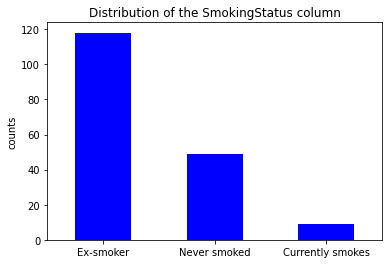

In [ ]:
#1 visualization

#smoking status

unique_train_df['SmokingStatus'].value_counts().plot(kind='bar', 
                                              color='blue',
                                              title='Distribution of the SmokingStatus column')

plt.ylabel('counts')
plt.xticks(rotation = 0)

In [ ]:
train_df['Weeks'].value_counts().head()

8     45
12    44
18    42
10    41
6     40
Name: Weeks, dtype: int64

In [ ]:
unique_train_df.head()

,Patient,Age,Sex,SmokingStatus
0,ID00007637202177411956430,79,Male,Ex-smoker
9,ID00009637202177434476278,69,Male,Ex-smoker
18,ID00010637202177584971671,60,Male,Ex-smoker
27,ID00011637202177653955184,72,Male,Ex-smoker
36,ID00012637202177665765362,65,Male,Never smoked


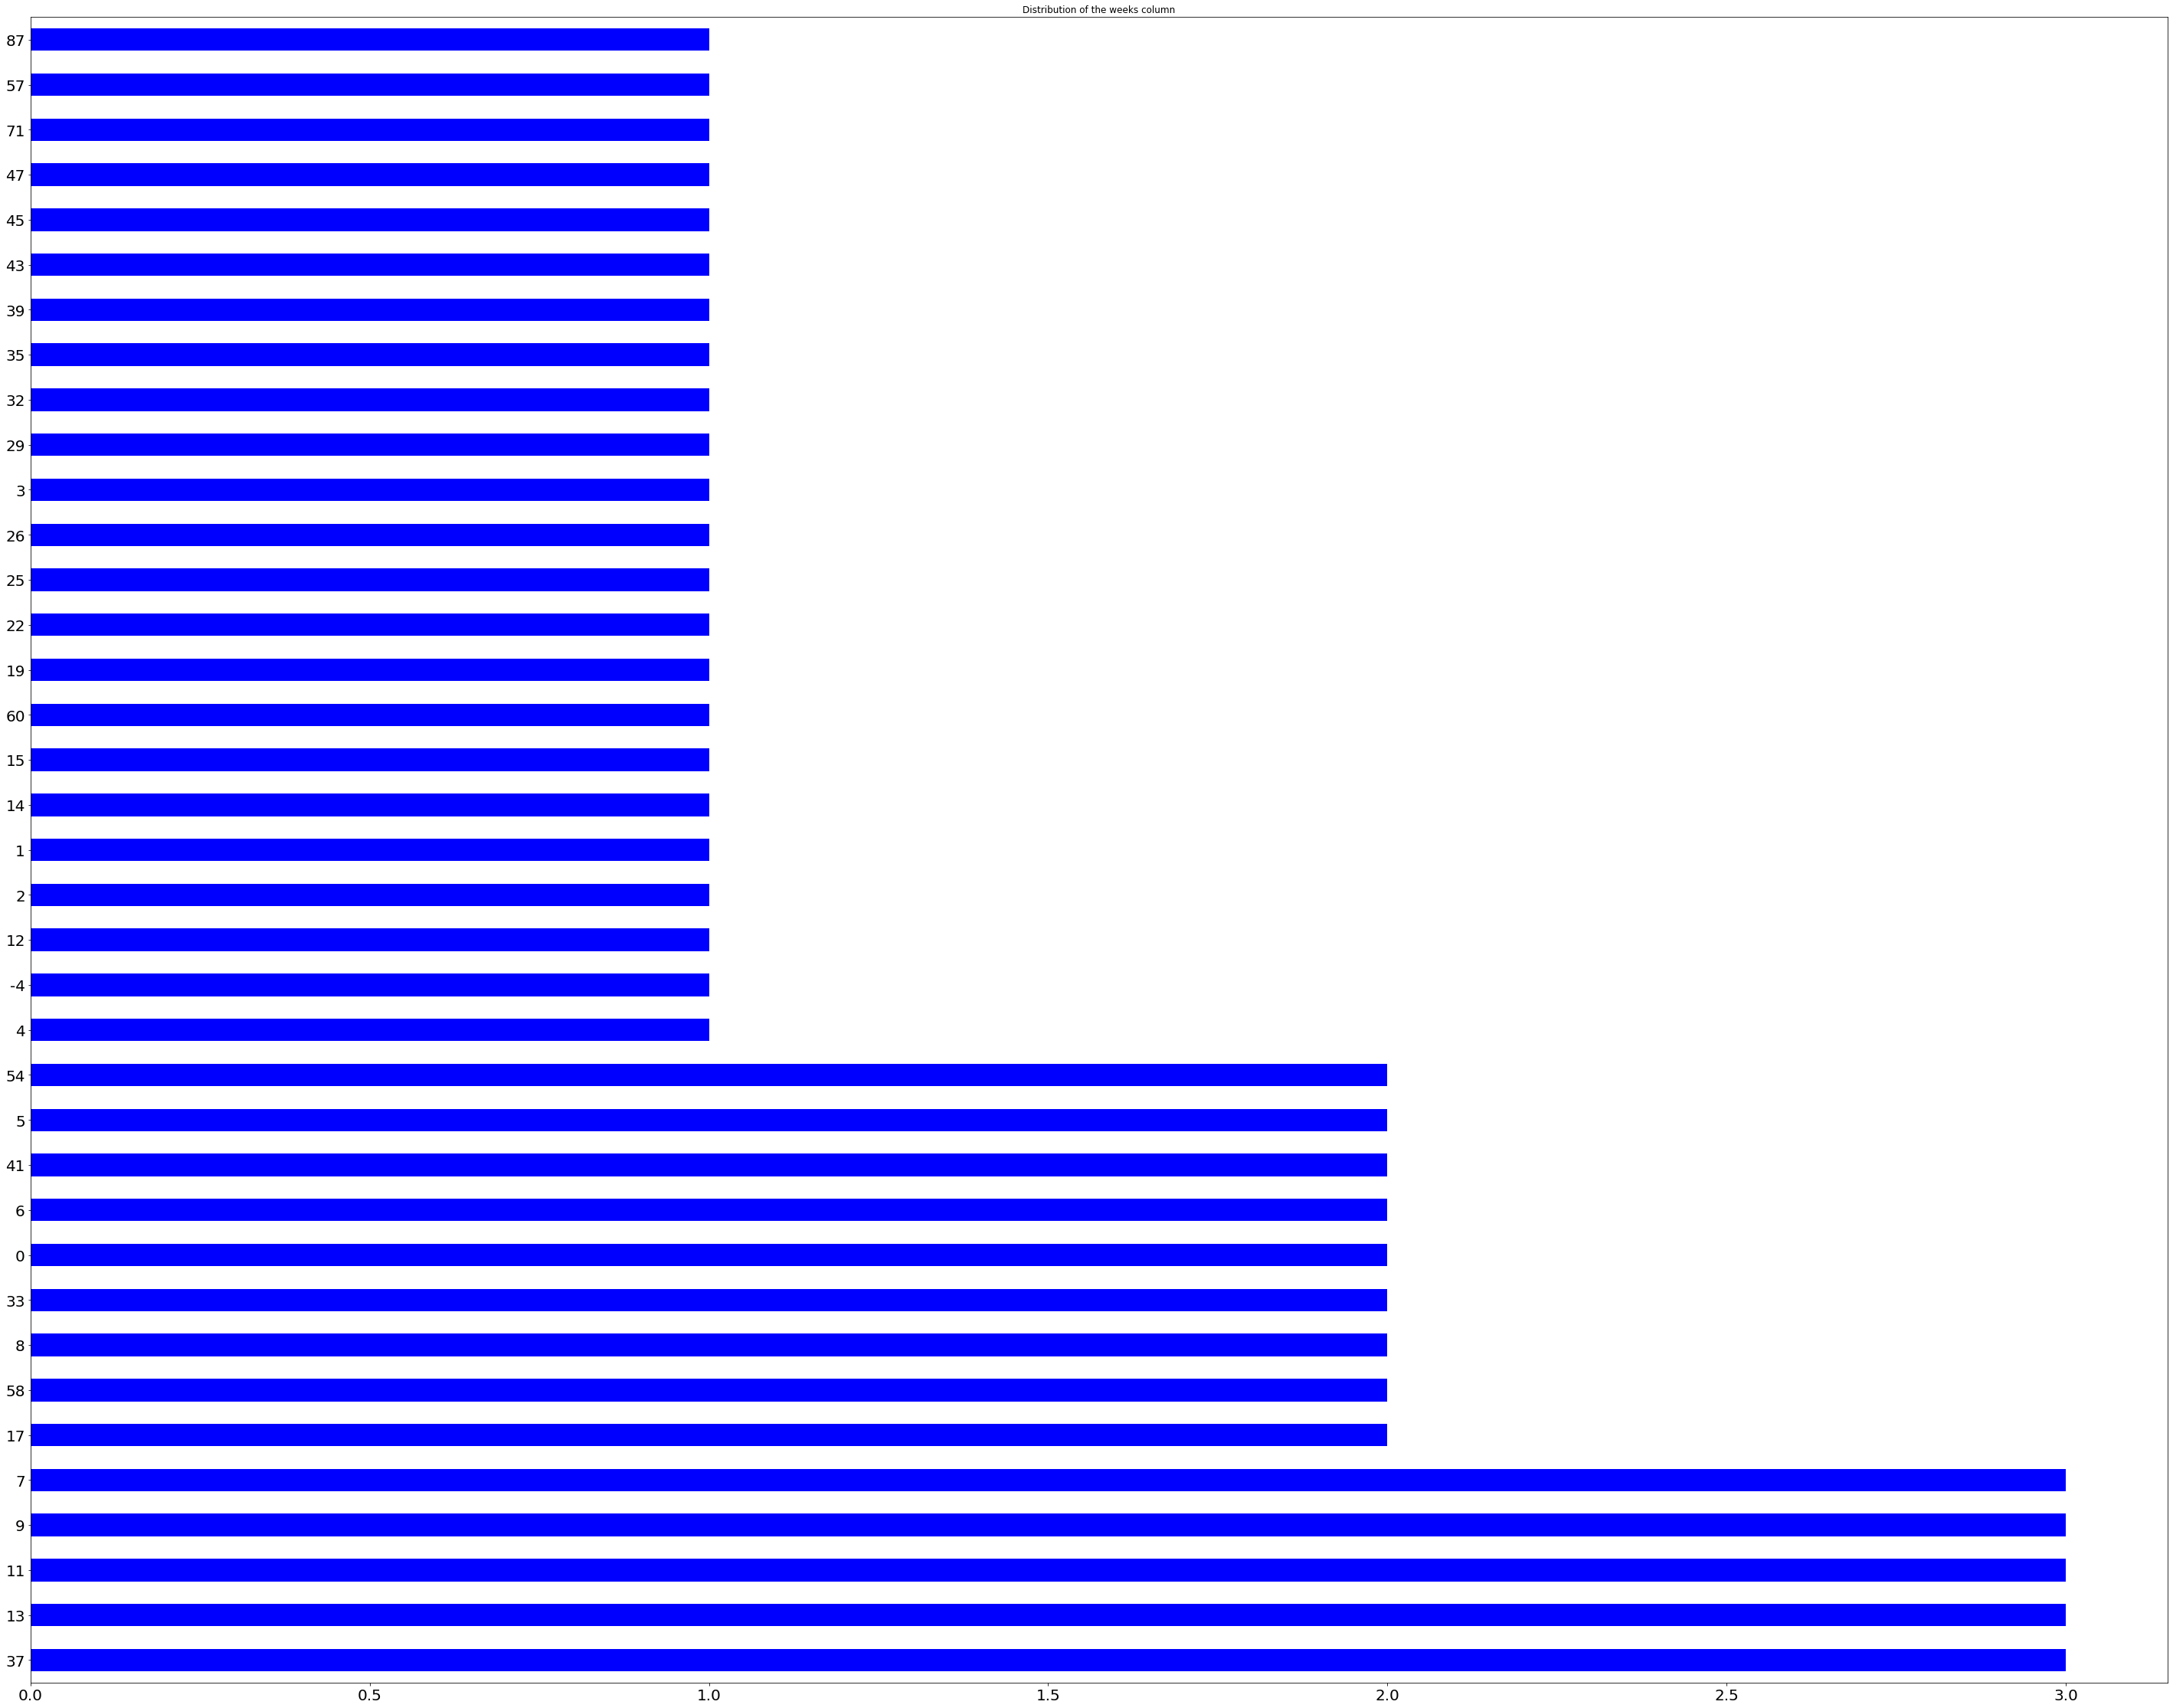

In [ ]:
#week distribution
plt.figure(figsize=(50,40))
train_df['Weeks'][:int(len(train_df['Weeks'].unique())/2)].value_counts().plot(kind='barh', color='blue',
                                              title='Distribution of the weeks column')
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)


In [ ]:
train_df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [ ]:
train_df['FVC'].max()

6399

In [ ]:
#fvc vs percent 
import plotly.express as px
plt.figure(figsize=(30,20))
px.scatter(train_df,x='Percent',y='FVC',color='Age')

<Figure size 2160x1440 with 0 Axes>

In [ ]:
#FVC vs age

px.bar(train_df,x='SmokingStatus',y='FVC',color='Age')

In [ ]:
#percent

train_df['Percent'].value_counts()


83.282505     2
86.559510     2
121.595445    2
80.474296     2
61.885639     2
             ..
82.589902     1
65.508606     1
52.391737     1
54.591498     1
52.749977     1
Name: Percent, Length: 1536, dtype: int64

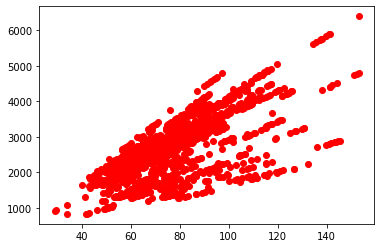

In [ ]:
plt.scatter(train_df['Percent'],train_df['FVC'],color='red')

In [ ]:
data = train_df.append([test_df, sub_df])

In [ ]:
len(data)

2284

In [ ]:
len(train_df),len(test_df),len(sub_df)

(1549, 5, 730)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 729
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1554 non-null   object 
 1   Weeks          1554 non-null   float64
 2   FVC            2284 non-null   int64  
 3   Percent        1554 non-null   float64
 4   Age            1554 non-null   float64
 5   Sex            1554 non-null   object 
 6   SmokingStatus  1554 non-null   object 
 7   Patient_Week   730 non-null    object 
 8   Confidence     730 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 178.4+ KB


In [ ]:
data.isnull().sum()

Patient           730
Weeks             730
FVC                 0
Percent           730
Age               730
Sex               730
SmokingStatus     730
Patient_Week     1554
Confidence       1554
dtype: int64

In [ ]:
train_df = pd.concat( (train_df,test_df) )

In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train_df['SmokingStatus']=label_encoder.fit_transform(train_df['SmokingStatus'])
train_df['Sex']=label_encoder.fit_transform(train_df['Sex'])

In [ ]:
train_df['Percent']       = (train_df['Percent'] - train_df['Percent'].mean()) / train_df['Percent'].std()
train_df['Age']           = (train_df['Age'] - train_df['Age'].mean()) / train_df['Age'].std()
train_df['Sex']           = (train_df['Sex'] - train_df['Sex'].mean()) / train_df['Sex'].std()
train_df['SmokingStatus'] = (train_df['SmokingStatus'] - train_df['SmokingStatus'].mean()) / train_df['SmokingStatus'].std()
train_df.head(10)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,-0.980824,1.672875,0.514074,-0.423579
1,ID00007637202177411956430,5,2214,-1.109228,1.672875,0.514074,-0.423579
2,ID00007637202177411956430,7,2061,-1.303741,1.672875,0.514074,-0.423579
3,ID00007637202177411956430,9,2144,-1.198221,1.672875,0.514074,-0.423579
4,ID00007637202177411956430,11,2069,-1.293571,1.672875,0.514074,-0.423579
5,ID00007637202177411956430,17,2101,-1.252888,1.672875,0.514074,-0.423579
6,ID00007637202177411956430,29,2000,-1.381292,1.672875,0.514074,-0.423579
7,ID00007637202177411956430,41,2064,-1.299927,1.672875,0.514074,-0.423579
8,ID00007637202177411956430,57,2057,-1.308827,1.672875,0.514074,-0.423579
9,ID00009637202177434476278,8,3660,0.384760,0.254782,0.514074,-0.423579


In [ ]:
train_df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,-0.980824,1.672875,0.514074,-0.423579
1,ID00007637202177411956430,5,2214,-1.109228,1.672875,0.514074,-0.423579
2,ID00007637202177411956430,7,2061,-1.303741,1.672875,0.514074,-0.423579
3,ID00007637202177411956430,9,2144,-1.198221,1.672875,0.514074,-0.423579
4,ID00007637202177411956430,11,2069,-1.293571,1.672875,0.514074,-0.423579


In [ ]:
#keras model

# model architecture https://www.kaggle.com/chrisden/6-82-quantile-reg-lr-schedulers-checkpoints

from tensorflow.keras.models import Model

i = Input(shape=(5,))
x = Dense(100, activation="relu", name="d1")(i)
x = Dense(100, activation="relu", name="d2")(x)
p1 = Dense(3, activation="linear", name="p1")(x)
p2 = Dense(3, activation="relu", name="p2")(x)
preds=preds =Lambda(lambda x: x[0] + tf.cumsum(x[1], axis = 1), 
                     name = "preds")([p1, p2])


model=Model(i,[p1,p2])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False),loss='mse')

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
d1 (Dense)                      (None, 100)          600         input_1[0][0]                    
__________________________________________________________________________________________________
d2 (Dense)                      (None, 100)          10100       d1[0][0]                         
__________________________________________________________________________________________________
p1 (Dense)                      (None, 3)            303         d2[0][0]                         
_______________________________________________________________________________________

In [ ]:
r=model.fit(train_df[['Weeks','Percent','Sex','SmokingStatus','Age']],train_df['FVC'],epochs=100,verbose=1)

Epoch 1/100
49/49 [==============================] - 0s 1ms/step - loss: 3668399.2500 - p1_loss: 1832280.2500 - p2_loss: 1836119.0000
Epoch 2/100
49/49 [==============================] - 0s 1ms/step - loss: 321144.1562 - p1_loss: 160728.4062 - p2_loss: 160415.7656
Epoch 3/100
49/49 [==============================] - 0s 1ms/step - loss: 228704.9219 - p1_loss: 114357.6328 - p2_loss: 114347.3047
Epoch 4/100
49/49 [==============================] - 0s 1ms/step - loss: 201001.7812 - p1_loss: 100505.1875 - p2_loss: 100496.5859
Epoch 5/100
49/49 [==============================] - 0s 1ms/step - loss: 220203.5156 - p1_loss: 110128.7734 - p2_loss: 110074.7734
Epoch 6/100
49/49 [==============================] - 0s 1ms/step - loss: 197868.0938 - p1_loss: 98918.8984 - p2_loss: 98949.1875
Epoch 7/100
49/49 [==============================] - 0s 1ms/step - loss: 215405.3906 - p1_loss: 107726.3125 - p2_loss: 107679.0312
Epoch 8/100
49/49 [==============================] - 0s 1ms/step - loss: 195778.65

In [ ]:
#quantile regression model
#linear model

from statsmodels.formula.api import quantreg

model_1=quantreg('FVC ~ Weeks+Sex+Age+SmokingStatus+Percent', train_df).fit(q=0.15)
model_2=quantreg('FVC ~ Weeks+Sex+Age+SmokingStatus+Percent', train_df).fit(q=0.50)
model_3=quantreg('FVC ~ Weeks+Percent+Age+Sex+SmokingStatus', train_df).fit( q=0.85 )


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
train_df['FVC1'],train_df['FVC2'],train_df['FVC3']=model_1.predict(train_df),model_2.predict(train_df),model_3.predict(train_df)

In [ ]:
train_df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,FVC1,FVC2,FVC3
0,ID00007637202177411956430,-4,2315,-0.980824,1.672875,0.514074,-0.423579,1906.845441,2115.694765,2304.700872
1,ID00007637202177411956430,5,2214,-1.109228,1.672875,0.514074,-0.423579,1826.888395,2025.968534,2208.437779
2,ID00007637202177411956430,7,2061,-1.303741,1.672875,0.514074,-0.423579,1715.515763,1899.472326,2061.031680
3,ID00007637202177411956430,9,2144,-1.198221,1.672875,0.514074,-0.423579,1773.348020,1965.594982,2141.416537
4,ID00007637202177411956430,11,2069,-1.293571,1.672875,0.514074,-0.423579,1717.899037,1902.760941,2069.297280


In [ ]:
train_df[["Patient","Weeks","FVC","FVC1","FVC2","FVC3"]].to_csv("my_submission.csv", index = False)

In [ ]:
!kaggle competitions submit -c osic-pulmonary-fibrosis-progression -f my_submission.csv -m 'submitted this through google colab'

100% 136k/136k [00:06<00:00, 22.7kB/s]
403 - This competition only allows kernel submissions.
